<a href="https://colab.research.google.com/github/varshapande/Project-of-machinelearning-/blob/main/Copy_of_digit_reconizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras_tuner
import tensorflow as tf
import keras_tuner as kt
import numpy as np 
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dftrain = pd.read_csv("/content/drive/MyDrive/digtrain.csv")
dftest = pd.read_csv('/content/drive/MyDrive/digtest.csv')
sample = pd.read_csv('/content/drive/MyDrive/sample_submission (8).csv')
sample

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0


In [ ]:
dftrain.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
dftest.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


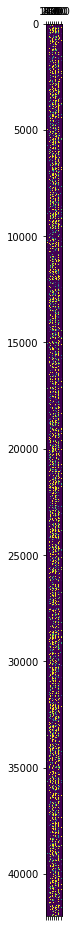

In [ ]:
plt.matshow(dftrain)

In [ ]:
DFtrain = dftrain.drop(columns = 'label',axis = 1)
Y = dftrain['label']

In [ ]:
df_train = DFtrain/255
df_test = dftest/255

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(DFtrain,Y,test_size = .3,random_state = 50)

In [ ]:
model = keras.models.Sequential([
        keras.layers.Flatten (input_shape = (784,)), 
        keras.layers.Dense (units = 900,activation = 'relu'), 
        keras.layers.Dense (units = 800,activation = 'relu'),
        keras.layers.Dense (units = 790,activation = 'softmax')       
])
model.compile(
    optimizer ='adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
model.fit(xtrain,ytrain,epochs = 10)

Epoch 1/10
919/919 [==============================] - 19s 20ms/step - loss: 1.7420 - accuracy: 0.8959
Epoch 2/10
919/919 [==============================] - 18s 20ms/step - loss: 0.2313 - accuracy: 0.9461
Epoch 3/10
919/919 [==============================] - 19s 20ms/step - loss: 0.1761 - accuracy: 0.9559
Epoch 4/10
919/919 [==============================] - 19s 20ms/step - loss: 0.1888 - accuracy: 0.9541
Epoch 5/10
919/919 [==============================] - 19s 20ms/step - loss: 0.1739 - accuracy: 0.9570
Epoch 6/10
919/919 [==============================] - 19s 20ms/step - loss: 0.1908 - accuracy: 0.9569
Epoch 7/10
919/919 [==============================] - 19s 20ms/step - loss: 0.1444 - accuracy: 0.9641
Epoch 8/10
919/919 [==============================] - 19s 20ms/step - loss: 0.1404 - accuracy: 0.9669
Epoch 9/10
919/919 [==============================] - 18s 20ms/step - loss: 0.1403 - accuracy: 0.9688
Epoch 10/10
919/919 [==============================] - 19s 20ms/step - loss: 0.123

In [ ]:
def build_model(hp):
  model = keras.Sequential()
  for i in range(hp.Int('num_layers',2,20)):
      model.add(layers.Dense(units = hp.Int('units_'+str(i),min_value = 32,max_value = 784,step = 32),activation = 'relu'))
  model.add(layers.Dense(1,activation = 'linear'))
  model.compile(
      optimizer = keras.optimizers.Adam(
        hp.Choice('learning_rate' ,[1e-2,1e-3,1e-4])),   
       loss = 'mean_absolute_error',
       metrics =['mean_absolute_error'])
  return model

In [ ]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_mean_absolute_error',
    max_trials=5,
    executions_per_trial = 3,
    directory = '**change-this-value**',
    project_name = 'digit_reconizer')

In [ ]:
#tuner.search(xtrain,ytrain, epochs=2,validation_data=(xtest,ytest))
#best_model = tuner.get_best_models()[0]

In [ ]:
tuner.search_space_summary()

In [ ]:
ypred = model.predict(dftest)
ypredlabel = [np.argmax(i) for i in ypred]

In [ ]:
submittest = pd.concat([sample['ImageId'],pd.DataFrame(ypredlabel)],axis=1)
submittest.columns = ['ImageId','label']
submittest.to_csv('sample_submission.csv',index = False)
submittest

,ImageId,label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
